In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
gender=pd.read_csv('gender_submission.csv')
train_set=pd.read_csv('train.csv')

In [3]:
train_set['FamilySize']=train_set['SibSp']+train_set['Parch']

In [4]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
test_set=pd.read_csv('test.csv')

In [7]:
test_set['FamilySize']=test_set['SibSp']+test_set['Parch']

In [8]:
len(test_set)

418

In [9]:
len(gender)

418

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [11]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [12]:
train_set.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carlsson, Mr. Frans Olof",male,347082,G6,S
freq,1,577,7,4,644


In [13]:
train_set.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [14]:
train_set[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_set[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train_set[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [17]:
import seaborn as sns

C:\Users\Jelly\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


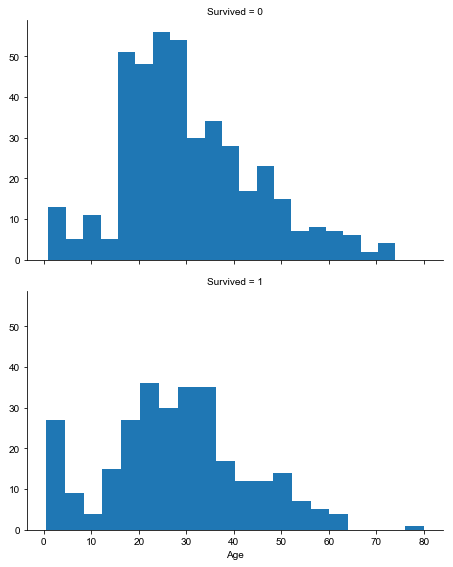

In [18]:
grid = sns.FacetGrid(train_set, 'Survived',size=4,aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
sns.set_style('darkgrid')
plt.show()

C:\Users\Jelly\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


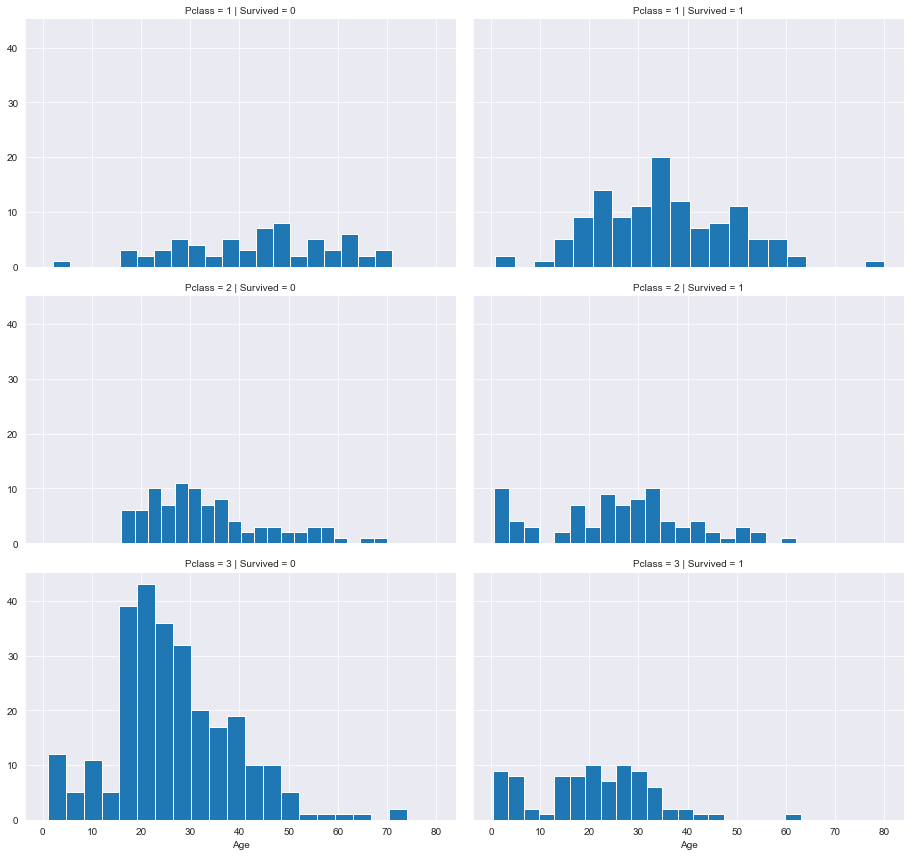

In [19]:
grid = sns.FacetGrid(train_set, row='Pclass',col='Survived',size=4,aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
sns.set_style('darkgrid')
plt.show()

C:\Users\Jelly\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


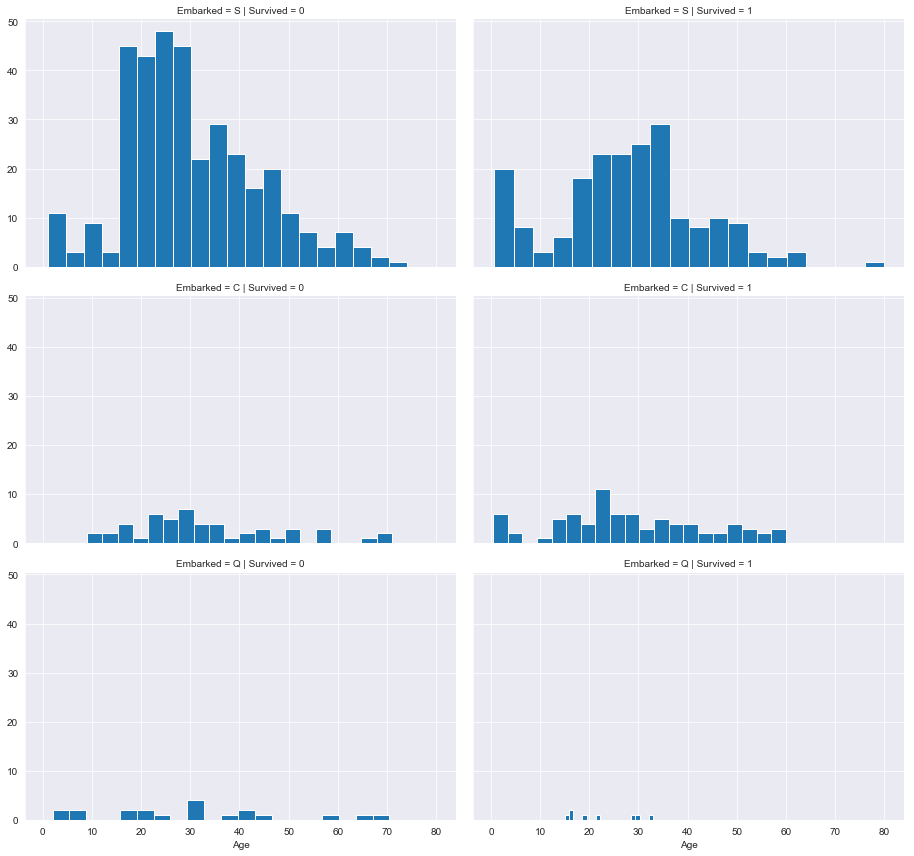

In [20]:
grid=sns.FacetGrid(train_set,row='Embarked',col='Survived',size=4,aspect=1.6)
grid.map(plt.hist,'Age',bins=20)
sns.set_style('darkgrid')
plt.show()

C:\Users\Jelly\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


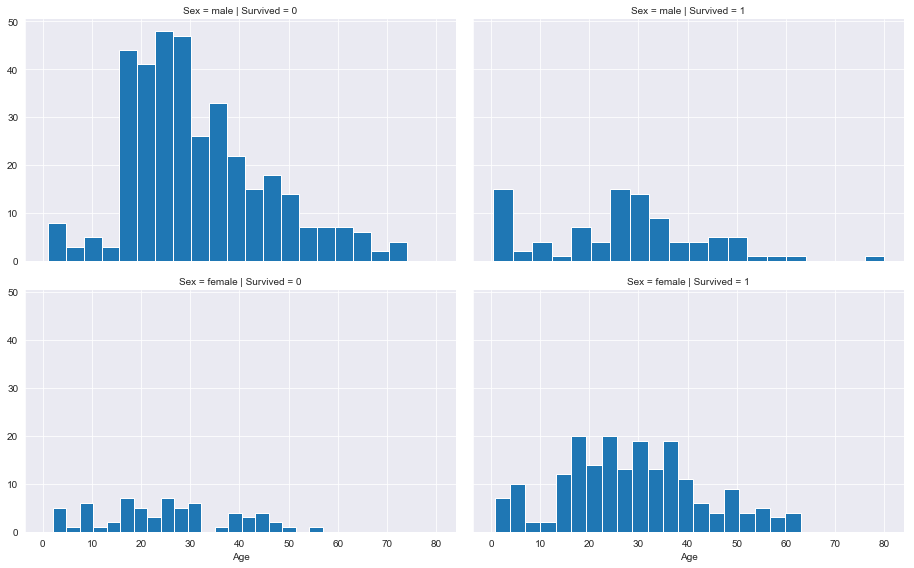

In [21]:
grid=sns.FacetGrid(train_set,row='Sex',col='Survived',size=4,aspect=1.6)
grid.map(plt.hist,'Age',bins=20)
sns.set_style('darkgrid')
plt.show()

C:\Users\Jelly\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Jelly\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


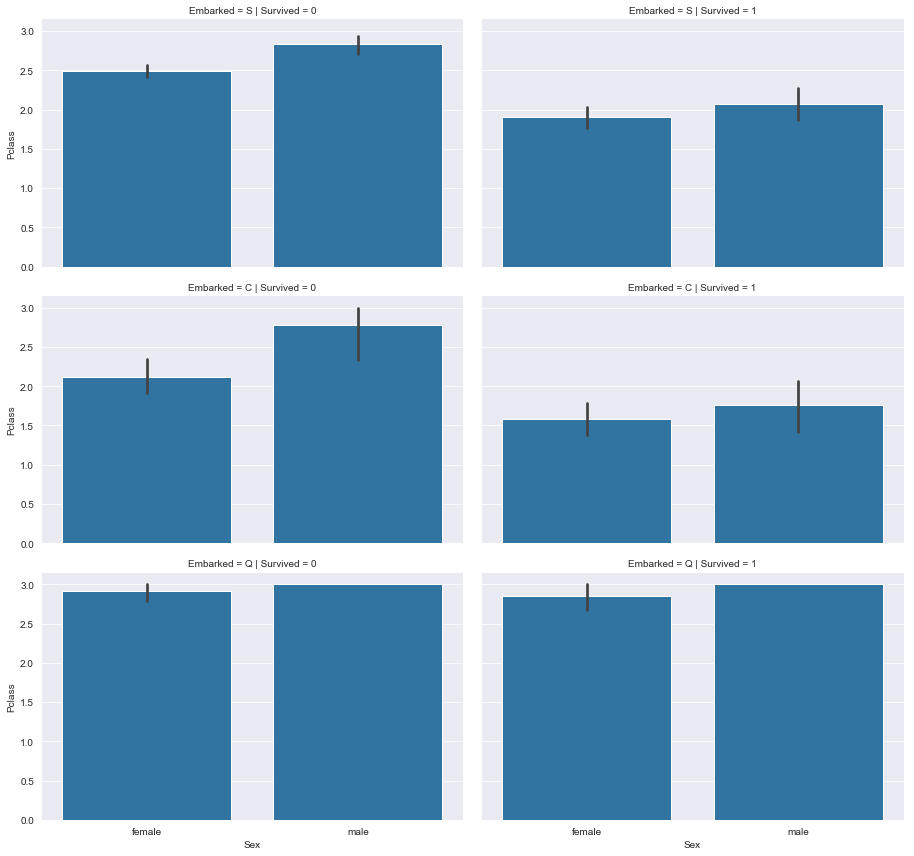

In [22]:
grid=sns.FacetGrid(train_set,row='Embarked',col='Survived',size=4,aspect=1.6)
grid.map(sns.barplot,'Sex','Pclass')
sns.set_style('darkgrid')
plt.show()

In [23]:
Survived_Cabin=train_set.Survived[(pd.notnull(train_set.Cabin))].value_counts()
Survived_noCabin=train_set.Survived[(pd.isnull(train_set.Cabin))].value_counts()

In [24]:
Survived_Cabin_Rate=Survived_Cabin[1]/(Survived_Cabin[0]+Survived_Cabin[1])
print(Survived_Cabin_Rate)

0.6666666666666666


In [25]:
Survived_noCabin_Rate=Survived_noCabin[1]/(Survived_noCabin[0]+Survived_noCabin[1])
print(Survived_noCabin_Rate)

0.29985443959243085


In [26]:
train_set['Title'] = train_set.Name.str.extract('([A-Za-z]+)\.', expand=False)
train_set['Title'] = train_set['Title'].replace(['Lady', 'Countess', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_set['Title'] = train_set['Title'].replace('Mlle', 'Miss')
train_set['Title'] = train_set['Title'].replace('Ms', 'Miss')
train_set['Title'] = train_set['Title'].replace('Mme', 'Mrs')
title_map = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
train_set['Title'] = train_set['Title'].map(title_map)
train_set['Title'] = train_set['Title'].fillna(0)

In [27]:
test_set['Title'] = test_set.Name.str.extract('([A-Za-z]+)\.', expand=False)
test_set['Title'] = test_set['Title'].replace(['Lady', 'Countess', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_set['Title'] = test_set['Title'].replace('Mlle', 'Miss')
test_set['Title'] = test_set['Title'].replace('Ms', 'Miss')
test_set['Title'] = test_set['Title'].replace('Mme', 'Mrs')
title_map = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
test_set['Title'] = test_set['Title'].map(title_map)
test_set['Title'] = test_set['Title'].fillna(0)

In [28]:
train_set[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,3.0,0.793651
2,2.0,0.702703
4,4.0,0.575000
5,5.0,0.363636
1,1.0,0.156673
0,0.0,0.000000


In [29]:
train_set['Sex'] = train_set['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [30]:
test_set['Sex'] = test_set['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [31]:
guess_ages = np.zeros((2, 3))
for i in range(0, 2):
    for j in range(0, 3):
         guess_df = train_set[(train_set['Sex'] == i) & (train_set['Pclass'] == j+1)]['Age'].dropna()
         age_guess = guess_df.median()
         guess_ages[i,j] = int(age_guess / 0.5 + 0.5) * 0.5
for i in range(0, 2):
    for j in range(0, 3):
        train_set.loc[(train_set.Age.isnull()) & (train_set.Sex == i) & (train_set.Pclass == j + 1), 'Age'] = guess_ages[i, j]
train_set['Age'] = train_set['Age'].astype(int)

In [32]:
for i in range(0, 2):
    for j in range(0, 3):
        test_set.loc[(test_set.Age.isnull()) & (test_set.Sex == i) & (test_set.Pclass == j + 1), 'Age'] = guess_ages[i, j]
test_set['Age'] = test_set['Age'].astype(int)

In [33]:
df = train_set['Ticket'].value_counts()
df = pd.DataFrame(df)
df = df[df['Ticket'] > 1]
df_ticket = df.index.values        #共享船票的票号
tickets = train_set.Ticket.values    #所有的船票
result = []
for ticket in tickets:
    if ticket in df_ticket:
        ticket = 1
    else:
        ticket = 0                 #遍历所有船票，在共享船票里面的为1，否则为0
    result.append(ticket)
results = pd.DataFrame(result)
results.columns = ['Ticket_Count']
train_set = pd.concat([train_set, results], axis=1)

In [34]:
df = test_set['Ticket'].value_counts()
df = pd.DataFrame(df)
df = df[df['Ticket'] > 1]
df_ticket = df.index.values        #共享船票的票号
tickets = test_set.Ticket.values    #所有的船票
result = []
for ticket in tickets:
    if ticket in df_ticket:
        ticket = 1
    else:
        ticket = 0                 #遍历所有船票，在共享船票里面的为1，否则为0
    result.append(ticket)
results = pd.DataFrame(result)
results.columns = ['Ticket_Count']
test_set = pd.concat([test_set, results], axis=1)

In [35]:
train_set.loc[ train_set['Age'] <= 10, 'Age'] = 0
train_set.loc[(train_set['Age'] > 10) & (train_set['Age'] <= 20), 'Age'] = 1
train_set.loc[(train_set['Age'] > 20) & (train_set['Age'] <= 30), 'Age'] = 2
train_set.loc[(train_set['Age'] > 30) & (train_set['Age'] <= 40), 'Age'] = 3
train_set.loc[(train_set['Age'] > 40) & (train_set['Age'] <= 50), 'Age'] = 4
train_set.loc[(train_set['Age'] > 50) & (train_set['Age'] <= 60), 'Age'] = 5
train_set.loc[ train_set['Age'] > 60, 'Age'] = 6

In [36]:
test_set.loc[ test_set['Age'] <= 10, 'Age'] = 0
test_set.loc[(test_set['Age'] > 10) & (test_set['Age'] <= 20), 'Age'] = 1
test_set.loc[(test_set['Age'] > 20) & (test_set['Age'] <= 30), 'Age'] = 2
test_set.loc[(test_set['Age'] > 30) & (test_set['Age'] <= 40), 'Age'] = 3
test_set.loc[(test_set['Age'] > 40) & (test_set['Age'] <= 50), 'Age'] = 4
test_set.loc[(test_set['Age'] > 50) & (test_set['Age'] <= 60), 'Age'] = 5
test_set.loc[ test_set['Age'] > 60, 'Age'] = 6

In [37]:
freq_fare=train_set.Fare.dropna().mode()[0]
test_set['Fare']=test_set['Fare'].fillna(freq_fare)

In [38]:
train_set.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title,Ticket_Count
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,2.362514,0.523008,0.381594,32.204208,0.904602,1.722783,0.386083
std,257.353842,0.486592,0.836071,0.477990,1.300781,1.102743,0.806057,49.693429,1.613459,1.025806,0.487123
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,6.000000,8.000000,6.000000,512.329200,10.000000,5.000000,1.000000


In [39]:
train_set['Pass_0']=(train_set['PassengerId']/100).astype(int)
train_set['Pass_1']=(train_set['PassengerId']%100).astype(int)
train_set['Pass_2']=(train_set['PassengerId']%10).astype(int)

In [40]:
test_set['Pass_0']=(test_set['PassengerId']/100).astype(int)
test_set['Pass_1']=(test_set['PassengerId']%100).astype(int)
test_set['Pass_2']=(test_set['PassengerId']%10).astype(int)

In [41]:
train_set.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title,Ticket_Count,Pass_0,Pass_1,Pass_2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,2.362514,0.523008,0.381594,32.204208,0.904602,1.722783,0.386083,3.968575,49.142536,4.496072
std,257.353842,0.486592,0.836071,0.477990,1.300781,1.102743,0.806057,49.693429,1.613459,1.025806,0.487123,2.564915,28.647233,2.874674
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,2.000000,24.000000,2.000000
50%,446.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,4.000000,49.000000,4.000000
75%,668.500000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000,6.000000,74.000000,7.000000
max,891.000000,1.000000,3.000000,1.000000,6.000000,8.000000,6.000000,512.329200,10.000000,5.000000,1.000000,8.000000,99.000000,9.000000


In [42]:
train_set.loc[ train_set['Fare'] <= train_set['Fare'].quantile(.3), 'Fare'] = 0
train_set.loc[(train_set['Fare'] > train_set['Fare'].quantile(.3)) & (train_set['Fare'] <= train_set['Fare'].quantile(.7)), 'Fare'] = 1
train_set.loc[ train_set['Fare'] > train_set['Fare'].quantile(.7), 'Fare'] = 2

In [43]:
test_set.loc[ test_set['Fare'] <= train_set['Fare'].quantile(.3), 'Fare'] = 0
test_set.loc[(test_set['Fare'] > train_set['Fare'].quantile(.3)) & (test_set['Fare'] <= train_set['Fare'].quantile(.7)), 'Fare'] = 1
test_set.loc[ test_set['Fare'] > train_set['Fare'].quantile(.7), 'Fare'] = 2

In [44]:
freq_port = train_set.Embarked.dropna().mode()[0]
train_set['Embarked'] = train_set['Embarked'].fillna(freq_port)

In [45]:
test_set['Embarked'] = test_set['Embarked'].fillna(freq_port)

In [46]:
train_set['Embarked'] = train_set['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [47]:
test_set['Embarked'] = test_set['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [48]:
train_set.loc[(train_set.Cabin.notnull()), 'Cabin'] = 1

In [49]:
train_set.loc[(train_set.Cabin.isnull()), 'Cabin'] = 0

In [50]:
test_set.loc[(test_set.Cabin.notnull()), 'Cabin'] = 1

In [51]:
test_set.loc[(test_set.Cabin.isnull()), 'Cabin'] = 0

In [52]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Ticket_Count,Pass_0,Pass_1,Pass_2
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,0.0,0,0,1,1.0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,2.0,1,1,1,3.0,0,0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,0.0,0,0,0,2.0,0,0,3,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,2.0,1,0,1,3.0,1,0,4,4
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,0.0,0,0,0,1.0,0,0,5,5


In [53]:
X=train_set.drop(['Survived','PassengerId','Name','Ticket','Parch','SibSp'],axis=1)

In [54]:
X_test=test_set.drop(['PassengerId','Name','Ticket','Parch','SibSp'],axis=1)

In [55]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title,Ticket_Count,Pass_0,Pass_1,Pass_2
0,3,1,2,0.0,0,0,1,1.0,0,0,1,1
1,1,0,3,2.0,1,1,1,3.0,0,0,2,2
2,3,0,2,0.0,0,0,0,2.0,0,0,3,3
3,1,0,3,2.0,1,0,1,3.0,1,0,4,4
4,3,1,3,0.0,0,0,0,1.0,0,0,5,5


In [56]:
y=train_set['Survived']

In [57]:
y_test=gender['Survived']

In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title,Ticket_Count,Pass_0,Pass_1,Pass_2
0,3,1,2,0.0,0,0,1,1.0,0,0,1,1
1,1,0,3,2.0,1,1,1,3.0,0,0,2,2
2,3,0,2,0.0,0,0,0,2.0,0,0,3,3
3,1,0,3,2.0,1,0,1,3.0,1,0,4,4
4,3,1,3,0.0,0,0,0,1.0,0,0,5,5


In [60]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [61]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, y)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X, y) * 100, 2)

# Support Vector Machines
svc = SVC()
svc.fit(X, y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X, y) * 100, 2)

#  k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X, y) * 100, 2)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X, y)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X, y)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X, y) * 100, 2)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X, y)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X, y) * 100, 2)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
print(models.sort_values(by='Score', ascending=False))

C:\Users\Jelly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Jelly\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to 

                        Model   Score
3               Random Forest  100.00
7               Decision Tree  100.00
0     Support Vector Machines   92.37
1                         KNN   83.05
2         Logistic Regression   81.71
6                  Linear SVC   79.57
4                 Naive Bayes   79.24
5  Stochastic Gradient Decent   69.14


In [62]:
features = pd.DataFrame()
features['Feature'] = X.columns
features['importance'] = random_forest.feature_importances_
print(features)

         Feature  importance
0         Pclass    0.070662
1            Sex    0.133359
2            Age    0.065779
3           Fare    0.047330
4          Cabin    0.041147
5       Embarked    0.033362
6     FamilySize    0.069744
7          Title    0.172766
8   Ticket_Count    0.023309
9         Pass_0    0.096897
10        Pass_1    0.150048
11        Pass_2    0.095598


In [63]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [68]:
forest = RandomForestClassifier(max_features='sqrt')
parameter_grid = {
                 'max_depth' : [4,5,6],
                 'n_estimators': [64,128,256],
                 'criterion': ['gini','entropy']
                 }
cross_validation = StratifiedKFold(n_splits=5,random_state=10)
grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8338945005611672
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 64}


In [65]:
Best score: 0.8316498316498316
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 64}

SyntaxError: invalid syntax (<ipython-input-65-84f6c0c2fc4b>, line 1)

In [69]:
random_forest = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=64, )
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)

In [70]:
submission = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

In [ ]:
X.describe()